## NLTK Corpus

In [1]:
import nltk
from nltk.corpus import brown
nltk.download('brown', quiet = True)
nltk.download('inaugural', quiet = True)

True

In [2]:
from nltk.corpus import inaugural

In [60]:
cfd1 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories = genre)
)
genres = brown.categories()
modals = ['can', 'could', 'may','might', 'will', 'would']
cfd1.tabulate(condtions = genres, samples= modals) 

                  can could   may might  will would 
      adventure    46   151     5    58    50   191 
 belles_lettres   246   213   207   113   236   392 
      editorial   121    56    74    39   233   180 
        fiction    37   166     8    44    52   287 
     government   117    38   153    13   244   120 
        hobbies   268    58   131    22   264    78 
          humor    16    30     8     8    13    56 
        learned   365   159   324   128   340   319 
           lore   170   141   165    49   175   186 
        mystery    42   141    13    57    20   186 
           news    93    86    66    38   389   244 
       religion    82    59    78    12    71    68 
        reviews    45    40    45    26    58    47 
        romance    74   193    11    51    43   244 
science_fiction    16    49     4    12    16    79 


In [61]:
# 위의 코드를 cfd로 한 번에 정리
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in ['can', 'could', 'may','might', 'will', 'would']
    
    for w in brown.words(categories=genre)
        if w.lower() == word
)

cfd.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


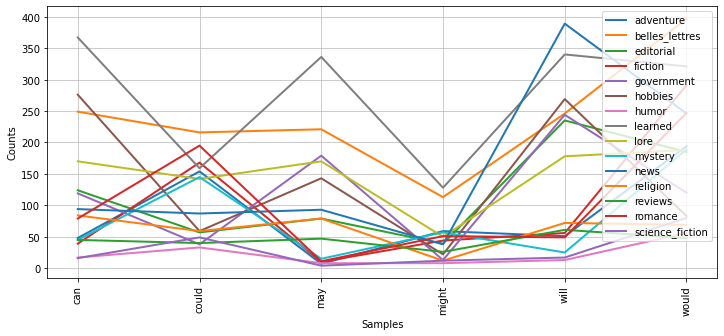

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
cfd.plot()

#### inaugural
- 연설문 데이터

In [63]:
inaugural = nltk.corpus.inaugural
# inaugural 연설문들을 모아놓은것

In [64]:
inaugural.fileids()[:3]

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt']

In [82]:
cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4])
    for target_word in ['free', 'right']
    for fileid in inaugural.fileids()[-1:-15:-1]
    
    for word in inaugural.words(fileids = fileid)
        if word.lower().startswith(target_word)
)

cfd2.tabulate()

        1969-Nixon   1973-Nixon  1977-Carter  1981-Reagan  1985-Reagan    1989-Bush 1993-Clinton 1997-Clinton    2001-Bush    2005-Bush   2009-Obama   2013-Obama   2017-Trump   2021-Biden 
 free            4            4            5           11           19           15            4            5            6           34            5           11            2            0 
right            0            7            4            1            5            5            2            1            1            6            2            3            7            3 


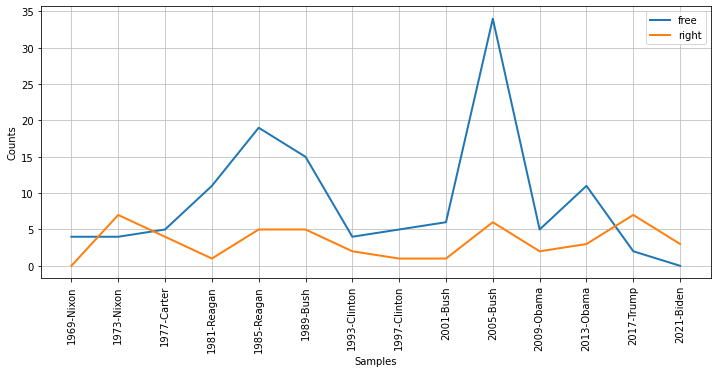

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [83]:
plt.figure(figsize=(12,5))
cfd2.plot()

## Tuple and List 

1. 생성하기
- Tuple
    - () or tuple()
- List
    - [], list()

1. 1 요소가 2개 이상일때
    - list의 경우
    - list = ['a','b']
    - tuple의 경우
    - 'a','b' or ('a','b')
1. 2 요소가 한개일때
    - list의 경우
    - ['a']
    - tuple의 경우
    - ('a',) >> ('a')으로 할경우 스트링!!

2. 여러 변수 할당하기 - 용어를 이해하는 것이 중요함!!!
- packing: 한 변수에 여러 개의 데이터를 할당하는 것
    - 리스트, 튜플 자체가 packing
- unpakcing: 여러 변수에 하나의 데이터를 할당하는 것. 그것을 각각의 변수로 변환하는 것
    - a,b,c = [1,2,3]

In [87]:
str1 = 'my name is siyoung'
str1 = str1.split()
print(str1)
a,b,c,d = str1
print([a],[b],[c],[d])

['my', 'name', 'is', 'siyoung']
['my'] ['name'] ['is'] ['siyoung']


In [88]:
# 튜플은 값을 교환하는데도 용의함
pwd = '112233'
user_id = 'dlfma'

pwd, user_id = user_id, pwd
print(pwd, user_id)

dlfma 112233


3. 연산
- 리스트와 동일함
- 두 tuple의 대소비교에서는 앞에서 부터 순서대로 비교

In [7]:
('ㄱ',) + ('ㄴ','ㄷ')

('ㄱ', 'ㄴ', 'ㄷ')

In [8]:
('ㄱ',)*4 + ('ㄴ','ㄷ')

('ㄱ', 'ㄱ', 'ㄱ', 'ㄱ', 'ㄴ', 'ㄷ')

In [9]:
a = 2,1,2,5,4
b = 1,3,3,6,8
a < b # a와 b의 0번째 자리에 위치한  값중 a가 더 크기 때문

False

4. 순회하기

In [10]:
a = 1, 2, 3, 4, 5, 6, 7, 8
for i in a:
    print(i)

1
2
3
4
5
6
7
8


5. list comprehension
- tuple? (x)

In [11]:
tuple([i for i in a])

(1, 2, 3, 4, 5, 6, 7, 8)

In [12]:
*[i for i in a],

(1, 2, 3, 4, 5, 6, 7, 8)

6. 튜플의 불변 객체이다.(가장 중요한 특징)
- a = 1,2,3,4(한 번 고정되면 변화하지 않음)
- 코드를 수정할 때 튜플 수정할 수 없게 하는 용도로 사용함.
- 중요한 key 값을 저장하거나 할 때 사용(고유한 번호)
- 메모리 사용이 적다.

In [13]:
a = ('id1',)
b = 'id2','id3'
id(a), id(a+b)

(2493635833472, 2493621574784)

7. 형 변환
- tuple()
- 리스트처럼 tuple()로 감싸면 가능
- 단, 리스트와 같이 스트링을 감싸면 음운 단위로 쪼개짐

In [14]:
tu = tuple('mouse')

In [15]:
tuple(['mouse'])

('mouse',)

8. 인덱스
- list와 동일함

In [16]:
tu[2]

'u'

#### 정리

- 튜플의 장점:
    - 타인이 변경하는 걸 막을 수 있다. ** 장점이자 단점
    - 메모리 사용이 적다.
- 리스트 장점:
    - 데이터 순차적으로 파악하기 좋다.
    - 중복되는 데이터를 포함할 수 있다.

## list 관련 함수

- 항목 추가하기
    - 리스트.append('~')- 리스트 추가
    - 리스트.insert(인덱스,'~')- 리스트 추가, offset 지정 가능
    - 리스트.extend('~') - 리스트 병합
    - 리스트 += 리스트

In [17]:
num_list = list(range(1,10))

In [18]:
num_list.append(11)
num_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]

In [19]:
num_list.insert(0,0) #리스트에 들어갈 index를 지정하는 것이 가능
num_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]

In [20]:
num_list.extend(['12','13','14','15']) #extend 속에 리스트가 들어가면 append와 달리 리스트 속 요소들만 추가
num_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, '12', '13', '14', '15']

In [21]:
num_list.append(['12','13','14','15']) #append속에 리스트가 들어가면 리스트 채로 추가
num_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 '12',
 '13',
 '14',
 '15',
 ['12', '13', '14', '15']]

In [22]:
num_list += ['12','13','14','15']
num_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 '12',
 '13',
 '14',
 '15',
 ['12', '13', '14', '15'],
 '12',
 '13',
 '14',
 '15']

- 항목 변경하기
    - 리스트[인덱스] = '~'
    - 슬라이싱 가능
    - 리스트[:인덱스] = <변수>

In [23]:
num_list = list(range(1,10))
num_list[-1]='end'
num_list

[1, 2, 3, 4, 5, 6, 7, 8, 'end']

In [24]:
num_list[:3] = ['abc']
num_list

['abc', 4, 5, 6, 7, 8, 'end']

In [25]:
num_list[:3] = 'abc'
num_list

['a', 'b', 'c', 6, 7, 8, 'end']

- 항목 삭제하기
    - del 리스트[인덱스] - 자리가 보존되지 않고 하나씩 당겨짐
    - 리스트.remove('<변수>')- 특정한 값을 제거하고 싶을 때, 그 변수가 처음나오는 값을 삭제
    - 리스트.pop() - # pop(index) default = -1 맨 마지막 요소 삭제 - 그 인덱스의 값을 반환하고 리스트에서 삭제
    - 리스트.clear() - 리스트 전부 제거

In [26]:
del num_list[0]
num_list

['b', 'c', 6, 7, 8, 'end']

In [27]:
num_list.remove('end')
num_list

['b', 'c', 6, 7, 8]

In [28]:
num_list.pop(2)
print(num_list)

['b', 'c', 7, 8]


In [29]:
num_list.clear()
num_list

[]

- 값 찾기
    - 리스트.index('<변수>')

In [105]:
num_list = list(range(1,10))
num_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [106]:
num_list.index(9)

8

In [107]:
num_list.index(3)

2

- 항목 정렬하기
    - 리스트.sort(reverse): 정렬한 뒤 값 반환하지 않고 기존 값이 변경되어 있음
    - sorted(리스트, reverse): 정렬된 복사본을 반환. 기존 값을 유지

    - 리스트.reverse()
    - list(reversed(리스트))

In [108]:
sorted(num_list, reverse = True)

[9, 8, 7, 6, 5, 4, 3, 2, 1]

In [109]:
num_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [111]:
num_list.sort(reverse = True)
num_list

[9, 8, 7, 6, 5, 4, 3, 2, 1]

- 항목 할당하기
    - =으로 할당할 때에는 하나의 값이 변하면 같이 변함. 메모리 주소를 참조하고 있으므로
    - shallow copy
        - a가 변해도 b가 변하지 않게 하는 복사
        - 리스트.copy()
        - list(리스트)
        - 리스트[:]
    - deep copy
        - 하위에 중첩된 리스트 요소가 바뀌는 것을 방지
        - 이차원 리스트

In [33]:
a = list(range(1,11))

In [34]:
#shallow copy
b = a.copy()
c = list(a)
d = a[:]
id(a), id(b), id(c), id(d)

(2493637926144, 2493635891904, 2493638043840, 2493638011904)

In [35]:
a.append([12,13,14])
print(a,b)
print(id(a), id(b))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, [12, 13, 14]] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
2493637926144 2493635891904


In [36]:
import copy
f = copy.deepcopy(a)
f[-1][1] = 0
a, f

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, [12, 13, 14]],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, [12, 0, 14]])

- 항목 순회하기
    - zip(): 여러개 리스트 동시 순회
    - enumerate(): 인덱스도 함게 돌고자 할 때
    - range(): 범위 순회

In [2]:
a = [1,2,3]
b = ['mon','tue','wed','thu']

for A, B in zip(a,b):
    print(A,B)

1 mon
2 tue
3 wed


In [3]:
list(zip(a,b))

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [4]:
for idx, item in enumerate(b):
    print(idx, item)

0 mon
1 tue
2 wed
3 thu


In [5]:
num_list = list(range(1,11))
num_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## 리스트 컴프리핸션 

In [46]:
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september'
         , 'october', 'november', 'december']
days = list(range(1, 13))

In [47]:
# 리스트 컴프리핸션을 아래와 같이 사용하면 for문을 두번 사용하는 것
[(month.title(), day) for month in months for day in days]

[('January', 1),
 ('January', 2),
 ('January', 3),
 ('January', 4),
 ('January', 5),
 ('January', 6),
 ('January', 7),
 ('January', 8),
 ('January', 9),
 ('January', 10),
 ('January', 11),
 ('January', 12),
 ('February', 1),
 ('February', 2),
 ('February', 3),
 ('February', 4),
 ('February', 5),
 ('February', 6),
 ('February', 7),
 ('February', 8),
 ('February', 9),
 ('February', 10),
 ('February', 11),
 ('February', 12),
 ('March', 1),
 ('March', 2),
 ('March', 3),
 ('March', 4),
 ('March', 5),
 ('March', 6),
 ('March', 7),
 ('March', 8),
 ('March', 9),
 ('March', 10),
 ('March', 11),
 ('March', 12),
 ('April', 1),
 ('April', 2),
 ('April', 3),
 ('April', 4),
 ('April', 5),
 ('April', 6),
 ('April', 7),
 ('April', 8),
 ('April', 9),
 ('April', 10),
 ('April', 11),
 ('April', 12),
 ('May', 1),
 ('May', 2),
 ('May', 3),
 ('May', 4),
 ('May', 5),
 ('May', 6),
 ('May', 7),
 ('May', 8),
 ('May', 9),
 ('May', 10),
 ('May', 11),
 ('May', 12),
 ('June', 1),
 ('June', 2),
 ('June', 3),
 ('June

In [48]:
empty_list = []
for month, day in zip(months, days):
    empty_list.append((month.title(), day))
print(empty_list)

[('January', 1), ('February', 2), ('March', 3), ('April', 4), ('May', 5), ('June', 6), ('July', 7), ('August', 8), ('September', 9), ('October', 10), ('November', 11), ('December', 12)]


In [49]:
for month in months:
    for day in days:
        print((month.title(), day))

('January', 1)
('January', 2)
('January', 3)
('January', 4)
('January', 5)
('January', 6)
('January', 7)
('January', 8)
('January', 9)
('January', 10)
('January', 11)
('January', 12)
('February', 1)
('February', 2)
('February', 3)
('February', 4)
('February', 5)
('February', 6)
('February', 7)
('February', 8)
('February', 9)
('February', 10)
('February', 11)
('February', 12)
('March', 1)
('March', 2)
('March', 3)
('March', 4)
('March', 5)
('March', 6)
('March', 7)
('March', 8)
('March', 9)
('March', 10)
('March', 11)
('March', 12)
('April', 1)
('April', 2)
('April', 3)
('April', 4)
('April', 5)
('April', 6)
('April', 7)
('April', 8)
('April', 9)
('April', 10)
('April', 11)
('April', 12)
('May', 1)
('May', 2)
('May', 3)
('May', 4)
('May', 5)
('May', 6)
('May', 7)
('May', 8)
('May', 9)
('May', 10)
('May', 11)
('May', 12)
('June', 1)
('June', 2)
('June', 3)
('June', 4)
('June', 5)
('June', 6)
('June', 7)
('June', 8)
('June', 9)
('June', 10)
('June', 11)
('June', 12)
('July', 1)
('July', 2

In [56]:
sentence = 'Where there is a will there is a way.'
[(s.upper(), s.title(), len(s), s.lower()) for s in sentence.split()]

[('WHERE', 'Where', 5, 'where'),
 ('THERE', 'There', 5, 'there'),
 ('IS', 'Is', 2, 'is'),
 ('A', 'A', 1, 'a'),
 ('WILL', 'Will', 4, 'will'),
 ('THERE', 'There', 5, 'there'),
 ('IS', 'Is', 2, 'is'),
 ('A', 'A', 1, 'a'),
 ('WAY.', 'Way.', 4, 'way.')]

In [117]:
texts = [
    ['hello', 'world'],
    ['how', 'are', 'you'],
    ['i', 'am', 'find'],
    ['Thank' ,'you']
]
texts

[['hello', 'world'],
 ['how', 'are', 'you'],
 ['i', 'am', 'find'],
 ['Thank', 'you']]

In [119]:
[" ".join(text) for text in texts]

['hello world', 'how are you', 'i am find', 'Thank you']

In [123]:
[word for text in texts for word in text]

['hello', 'world', 'how', 'are', 'you', 'i', 'am', 'find', 'Thank', 'you']

In [124]:
' '.join([word for text in texts for word in text])

'hello world how are you i am find Thank you'

#### 과제
- romance = brown.raw(categories='romance')[:5000]
- 과제란에 별도 제출
- 문장 분절 있는 토큰 리스트로 만들기
- 리스트컴프리핸션, 포문 사용해서 불필요한 것들 제거
    - 문장부호 모두 제거